# 0407

Related links

- [Course website](https://www-math.nsysu.edu.tw/~chlin/2025SMath599/2025SMath599.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## Data

In [19]:
### load nsysu

import os
import urllib
import numpy as np

base = r"https://github.com/SageLabTW/auto-grading/raw/master/nsysu-digits/"
for c in ['X', 'y']:
    filename = "nsysu-digits-%s.csv"%c
    if filename not in os.listdir('.'):
        print(filename, 'not found --- will download')
        urllib.request.urlretrieve(base + c + ".csv", filename)

Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')

In [20]:
# load MNIST (long)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

[Sample DataFrame](https://docs.google.com/spreadsheets/d/1pzcuTVMyRhBrwmcpOnGILUjMsPeF8fjkSSLwUuevXJ0/edit?usp=sharing)

In [21]:
from sklearn import datasets
titanic = datasets.fetch_openml(name='titanic', version=1, as_frame=True)

In [22]:
# required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## [Histograms, Binnings, and Density](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html)

Histogram is used to visualize the distribution.

(array([  1.,   2.,   1.,   3.,   1.,   4.,   8.,  10.,  23.,  31.,  42.,
         55.,  66.,  80., 111.,  89.,  87.,  96.,  71.,  79.,  46.,  27.,
         21.,  18.,  11.,   7.,   6.,   2.,   0.,   2.]),
 array([-3.85817404, -3.61487942, -3.3715848 , -3.12829018, -2.88499556,
        -2.64170093, -2.39840631, -2.15511169, -1.91181707, -1.66852245,
        -1.42522783, -1.1819332 , -0.93863858, -0.69534396, -0.45204934,
        -0.20875472,  0.03453991,  0.27783453,  0.52112915,  0.76442377,
         1.00771839,  1.25101302,  1.49430764,  1.73760226,  1.98089688,
         2.2241915 ,  2.46748612,  2.71078075,  2.95407537,  3.19736999,
         3.44066461]),
 <BarContainer object of 30 artists>)

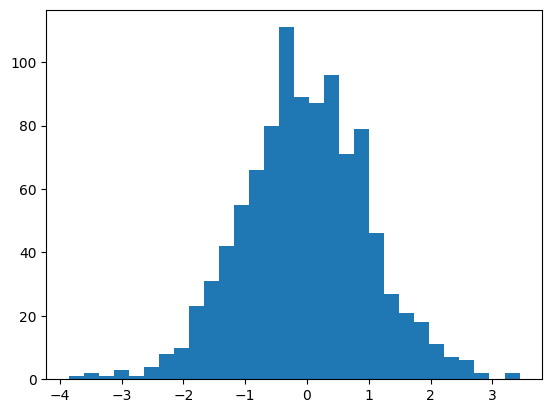

In [137]:
# plt.hist with normal distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

arr = np.random.randn(1000)
plt.hist(arr, bins=30)

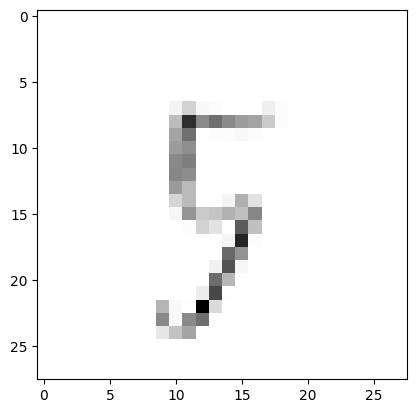

In [28]:
# plt.histogram with normal distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = Xsys[0]
img =x.reshape(28,28)
plt.imshow(img, cmap="Greys")

(array([732.,   6.,   4.,  11.,   8.,  12.,   5.,   3.,   2.,   1.]),
 array([ 0. ,  8.6, 17.2, 25.8, 34.4, 43. , 51.6, 60.2, 68.8, 77.4, 86. ]),
 <BarContainer object of 10 artists>)

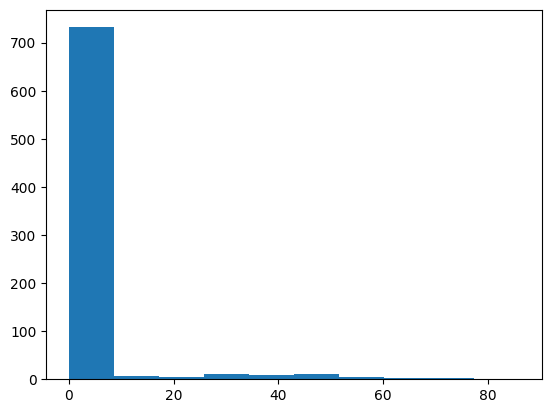

In [29]:
plt.hist(x)

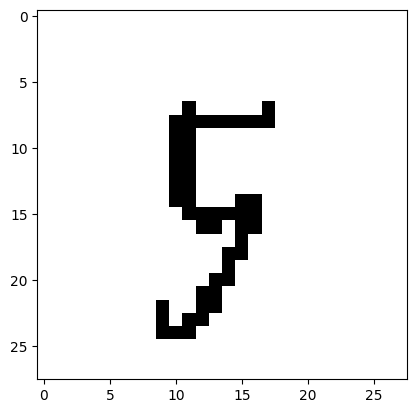

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
img[img > 5] = 255
img[img <= 5] = 0
plt.imshow(img, cmap="Greys")

In [ ]:
# distribution of the darkness of a photo


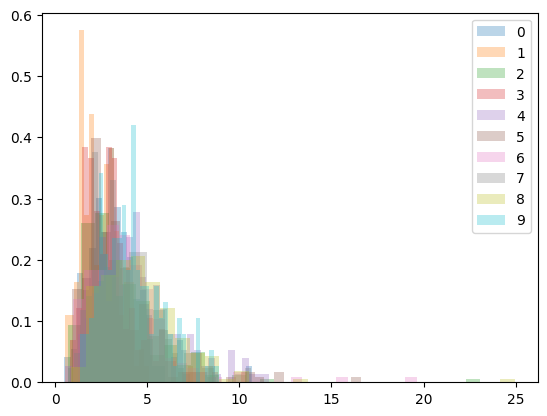

In [44]:
# distribution of the amount of ink for each digit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
for i in range(10):
    ink = Xsys[ysys == i].mean(axis=1)
    plt.hist(ink, bins=30,alpha=0.3,density=True,label="%d"%(i))
plt.legend()

In [ ]:
# try the MNIST data

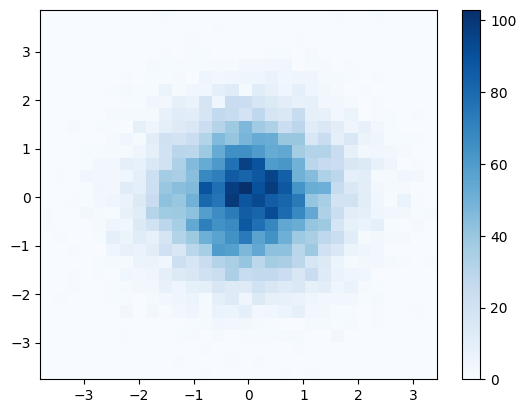

In [49]:
# hist2d with x,y normal
x = np.random.randn(10000)
y = np.random.randn(10000)

plt.hist2d(x, y, bins=30, cmap='Blues')
plt.colorbar()
plt.show()

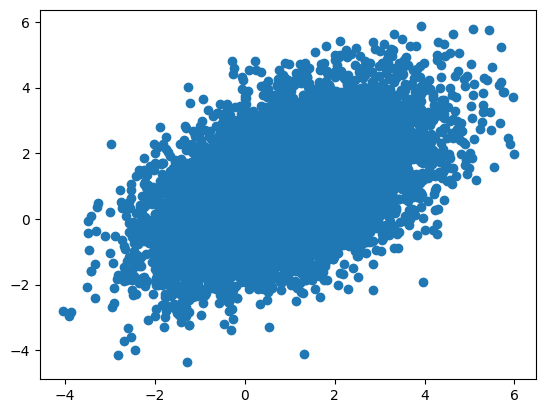

In [54]:
# hist2d with multivariate_normal
center = np.array([1,1])
cov = np.array([
    [2,1],
    [1,2]
])
arr = np.random.multivariate_normal(center, cov, 10000)
plt.scatter(*arr.T)
plt.axis = "equal"

In [56]:
arr.shape

(10000, 2)

## [Customizing Plot Legends](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html)

- Legend is used for discrete labels.
- Add `c` and `cmap` in your plot.
- `plt.legend()` handles the legend automatically.

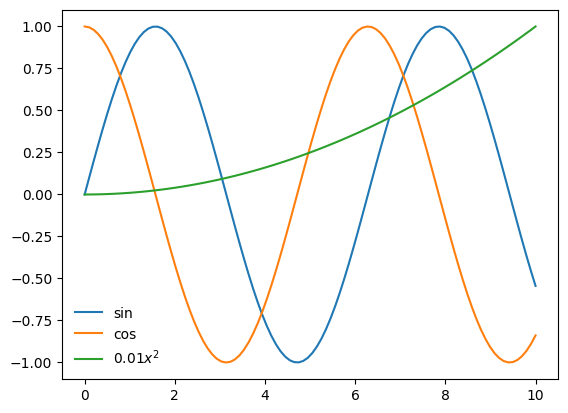

In [ ]:
# Read the textbook for more examples.
x = np.linspace(0,10,100)
y_sin = np.sin(x)
y_cos = np.cos(x)
y_square = 0.01*np.square(x)
plt.plot(x, y_sin, label='sin')
plt.plot(x, y_cos, label='cos')
plt.plot(x, y_square, label='$0.01 x^2$')
plt.legend(frameon=False) 

plt.show()

## [Customizing Colorbars](https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html)

- Colorbar is used for continuous labels.
- Add `c` and `cmap`
- `plt.colorbar()` handles the colorbar automatically.

In [127]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
x = iris.data
y = iris.target
print(x.shape, y.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4) (150,)


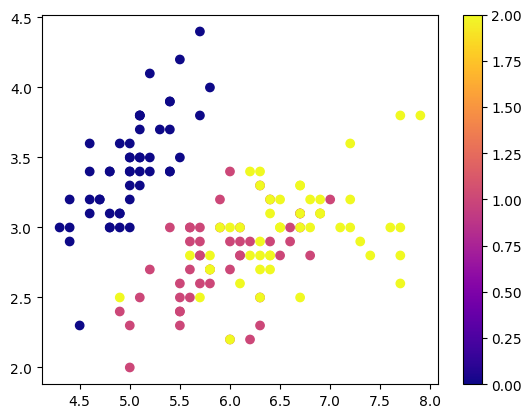

In [124]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='plasma')
plt.colorbar()

plt.show()

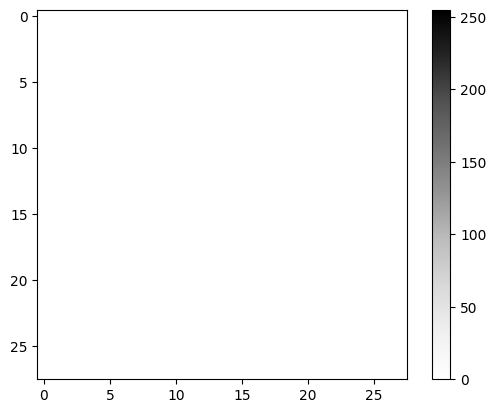

In [125]:
img = Xsys[0].reshape(28,28)
zero_img = np.zeros_like(img)
full_img = np.full_like(img, 255)
plt.imshow(zero_img, cmap='Greys',vmin=0,vmax=255)
plt.colorbar()

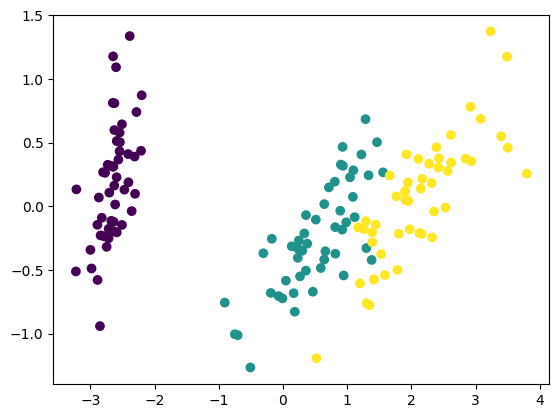

In [136]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_new = pca.fit_transform(x)

plt.scatter(*X_new.T,c=y)


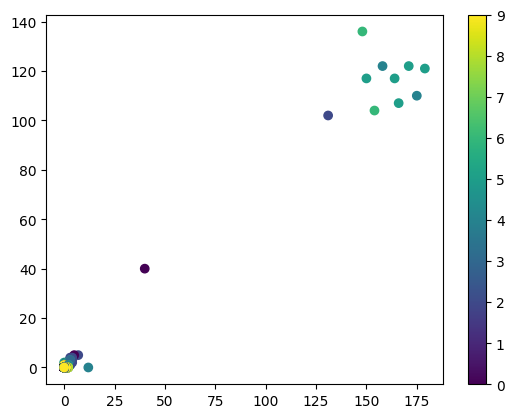

In [130]:
# Read the textbook for more examples.
i,j = 0,1
plt.scatter(Xsys[:,0],Xsys[:,1],c=ysys)
plt.colorbar()

Choose your colormap depending on your data type:
- Sequntial colormaps: only relative quantity matters, such as the features of `iris` (e.g., `binary` or `viridis`)
- Divergent colormaps: positive and negative matter, such as correlation and stock marcket price changes (e.g., `RdBu` or `PuOr`)
- Qualitative colormaps: no particular order (e.g., `rainbow` or `jet`)

In [ ]:
# iris

In [ ]:
# NSYSU-digits

## [Multiple Subplots](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)

- `axes` is the object for your to draw a plot.
- `plt.plot` or so add an axes automatically if it does not exist.
- Use `plt.axes([left, bottom, width, height])` to add an axes.

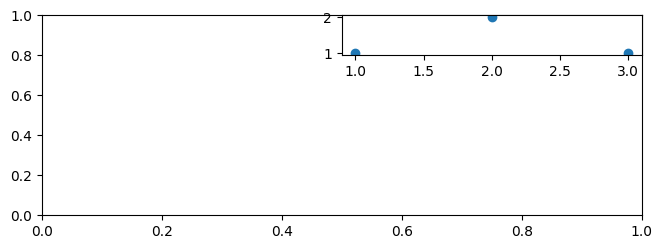

In [139]:
# plt.axes
fig = plt.figure(figsize=(6,2))
ax1 = plt.axes([0,0,1,1])
ax2 = plt.axes([0.5,0.8,0.5,0.2])
ax2.scatter([1,2,3],[1,2,1])

Use `plt.subplot` and `plt.subplots` to add grids of subplots.

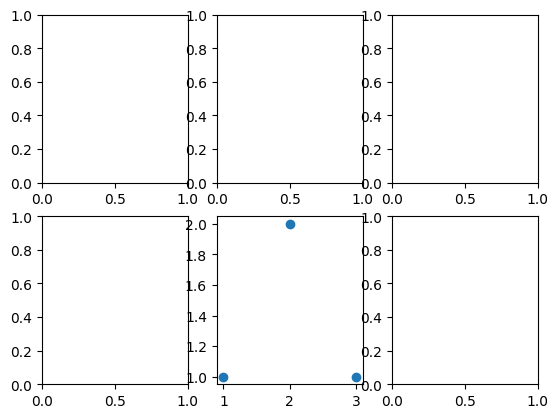

In [147]:
# plt.subplot
fig,axs = plt.subplots(2,3)
axs[1,1].scatter([1,2,3],[1,2,1])

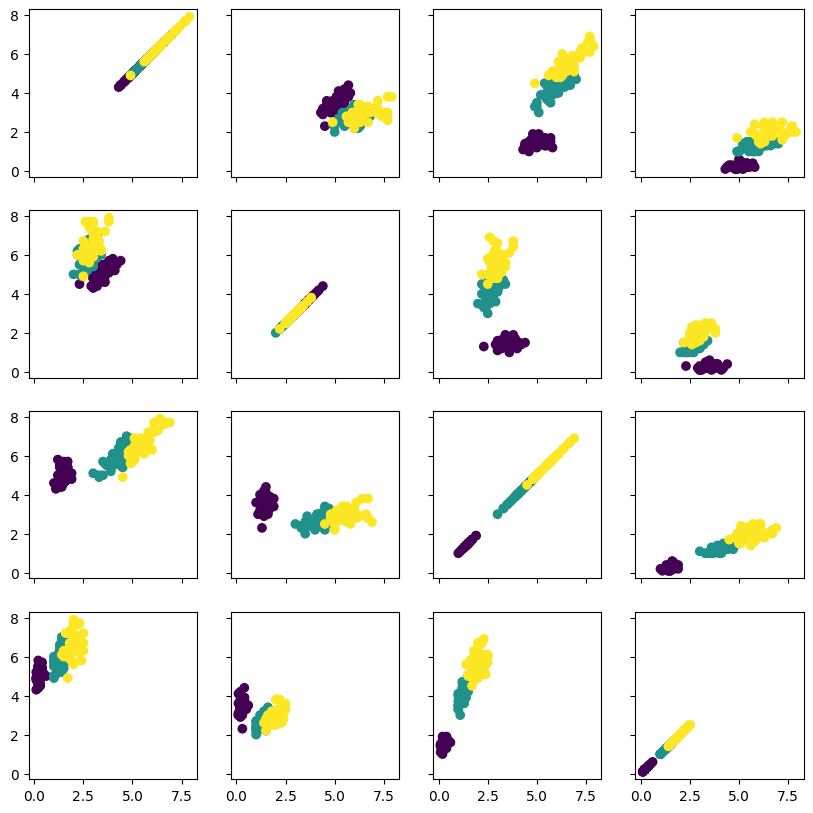

In [153]:
from sklearn.datasets import load_iris
iris = load_iris()
fig,axs = plt.subplots(4,4,figsize=(10,10),sharex=True,sharey=True)
x = iris.data
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],c=y)

In [ ]:
# plt.subplots

In [ ]:
# iris mutual feature

Read `plt.GridSpec` in textbook.

## Homework

- Type your answers here and submit your answer in `*.ipynb` format.
- You may use code cell and Markdown cell.

In [ ]:
NAME = "李瑋宸" # change to your name
STD_ID = "B123245008" # change to your student ID
print("My name is %s and my student ID is %s."%(NAME, STD_ID))

My name is 李瑋宸 and my student ID is B123245008.


### 1. Basic Histogram Plot
Create a simple histogram using NumPy's random normal data. Use 30 bins and visualize it using Matplotlib. Add axis labels and a title.

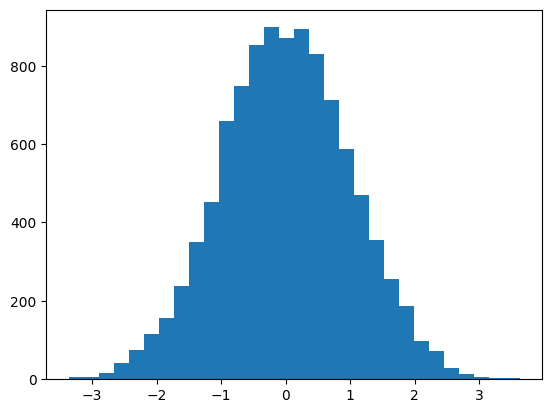

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.random.randn(10000)
plt.hist(x, bins=30, density=False)

plt.show()

### 2. Overlapping Histograms with Transparency
Generate two datasets from normal distributions with different means. Plot overlapping histograms with transparency (`alpha`) to compare the distributions.

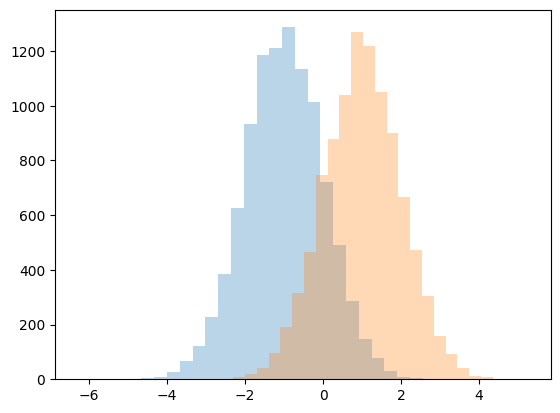

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.random.randn(10000) - 1
y = np.random.randn(10000) + 1
plt.hist(x, bins=30, density=False,alpha=0.3)
plt.hist(y, bins=30, density=False,alpha=0.3)

plt.show()


### 3. Histogram with Density Estimation
Plot a histogram of normally distributed data with the density option enabled. Overlay a KDE (kernel density estimate) using `scipy.stats.gaussian_kde`.

(array([0.00476424, 0.00476424, 0.        , 0.04764239, 0.03334967,
        0.03334967, 0.07146358, 0.11434173, 0.18104108, 0.23344771,
        0.25250466, 0.29061857, 0.42401726, 0.33826096, 0.29538281,
        0.4049603 , 0.32873248, 0.30491129, 0.33349672, 0.31443977,
        0.27632586, 0.13339869, 0.12387021, 0.08099206, 0.07146358,
        0.02858543, 0.01429272, 0.00476424, 0.00952848, 0.00952848]),
 array([-3.17536252, -2.9654654 , -2.75556829, -2.54567117, -2.33577406,
        -2.12587694, -1.91597982, -1.70608271, -1.49618559, -1.28628848,
        -1.07639136, -0.86649425, -0.65659713, -0.44670001, -0.2368029 ,
        -0.02690578,  0.18299133,  0.39288845,  0.60278557,  0.81268268,
         1.0225798 ,  1.23247691,  1.44237403,  1.65227114,  1.86216826,
         2.07206538,  2.28196249,  2.49185961,  2.70175672,  2.91165384,
         3.12155096]),
 <BarContainer object of 30 artists>)

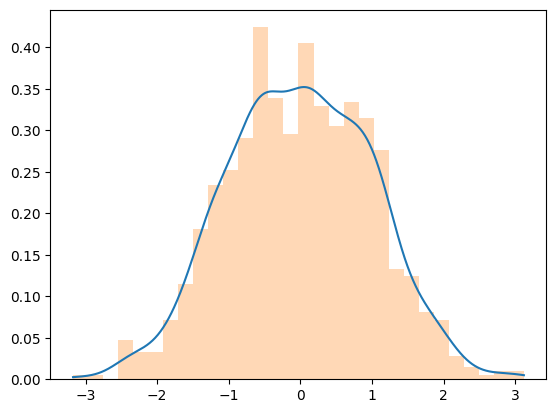

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

x = np.random.randn(1000)
kde = scipy.stats.gaussian_kde(x)
plt.plot(np.linspace(min(x),max(x),len(x)), kde(np.linspace(min(x),max(x),len(x))), label='kde')
plt.hist(x,bins=30, density=True, alpha=0.3)




### 4. Custom Binning Strategy
Use NumPy’s `linspace` to define custom bin edges for a histogram. Visualize the result and explain how the bin edges affect the shape.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  1.,  1.,  2.,
         1.,  4.,  4.,  8.,  3.,  7.,  6., 10., 16., 12., 23., 16., 26.,
        20., 24., 35., 30., 26., 29., 39., 35., 26., 35., 48., 44., 43.,
        42., 36., 39., 34., 34., 31., 44., 27., 24., 19., 12., 10.,  7.,
        11., 12.,  6.,  4.,  6.,  3.,  3.,  2.,  4.,  2.,  2.,  1.,  3.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
        -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
        -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
        -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
        -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
        -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
 

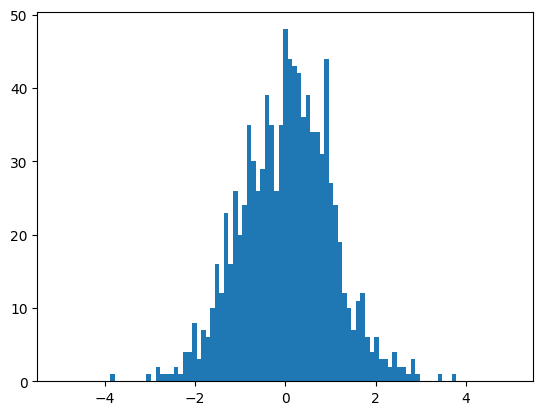

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
a = np.random.randn(1000)
custom_bins = np.linspace(-5,5,100)
plt.hist(a,bins=custom_bins)

### 5. Customized Legend Placement
Plot two curves (e.g., `sin(x)` and `cos(x)`), label them, and add a customized legend outside the main plot area (e.g., right side of the figure).

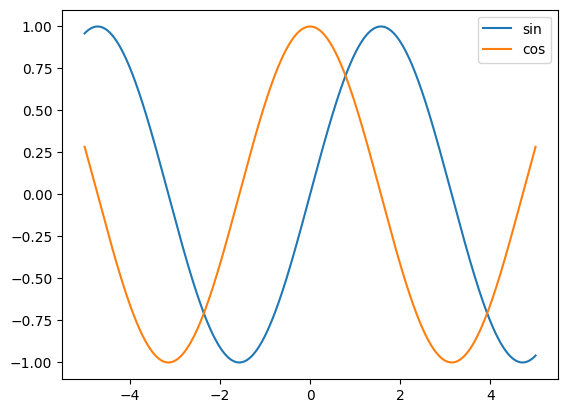

In [13]:
import numpy as np

x = np.linspace(-5,5,1000)
y_cos = np.cos(x)
y_sin = np.sin(x)
plt.plot(x, y_sin, label='sin')
plt.plot(x, y_cos, label='cos')
plt.legend(loc='upper right')
plt.show()

### 6. Fancy Legend Styling
Create a scatter plot with different categories (e.g., using color or marker style). Add a legend with customized frame, location, and title.

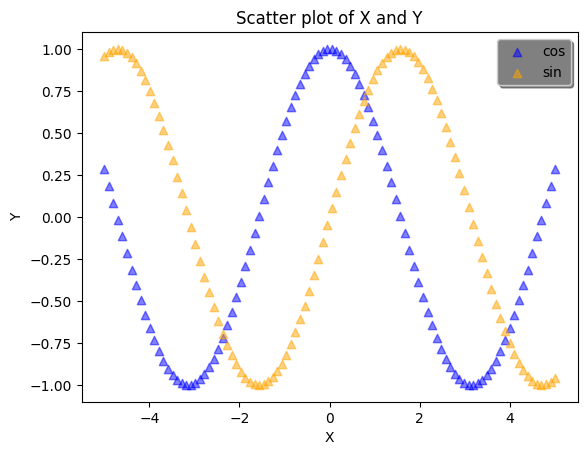

In [14]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5,5,100)
y_cos = np.cos(x)
y_sin = np.sin(x)
plt.scatter(x, y_cos, alpha=0.5,c="blue",marker='^',label='cos')
plt.scatter(x, y_sin, alpha=0.5,c="orange",marker='^',label='sin')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of X and Y")
plt.legend(frameon=True,loc='upper right',shadow=True,facecolor='grey')

### 7. Heatmap with Colorbar
Generate a 2D Gaussian or random matrix and visualize it using `plt.imshow()` or `plt.pcolormesh()`. Add a colorbar and label it.

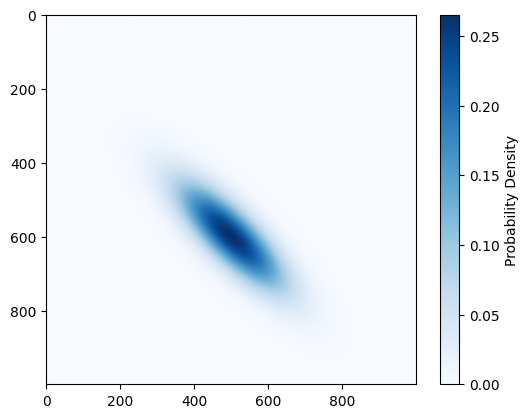

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x = np.linspace(-5,5,1000)
y = np.linspace(-5,5,1000)
x,y = np.meshgrid(x,y)
pos = np.dstack((x,y))
rv = multivariate_normal([0,1], [[1,0.8], [0.8,1]])
z = rv.pdf(pos)
plt.imshow(z, cmap='Blues')
plt.colorbar(label='Probability Density')


### 8. Custom Colorbar Ticks and Labels
Using the previous heatmap, customize the colorbar with labeled ticks and formatting (e.g., scientific notation or percentage format).

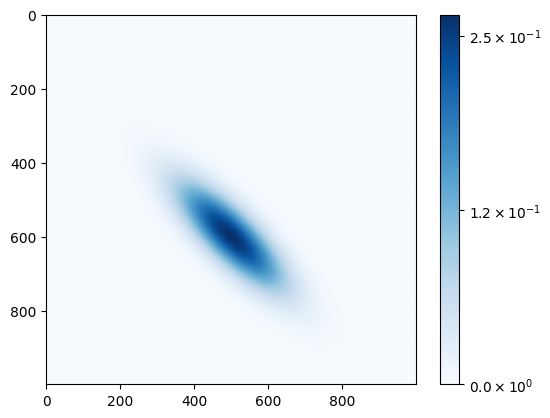

In [16]:
import matplotlib.ticker as ticker

plt.imshow(z, cmap='Blues')

def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

plt.colorbar(ticks=[0,0.125,0.25],format=ticker.FuncFormatter(fmt))


### 9. Simple Grid of Subplots
Create a 2×2 grid of subplots using `plt.subplots()`. Plot different mathematical functions (e.g., `sin`, `cos`, `exp`, `log`) in each subplot with appropriate titles.

C:\Users\User\AppData\Local\Temp\ipykernel_3356\3533113755.py:16: RuntimeWarning: divide by zero encountered in log
  axes[1][1].plot(x, np.log(x), label='log')


Text(0.5, 1.0, 'log')

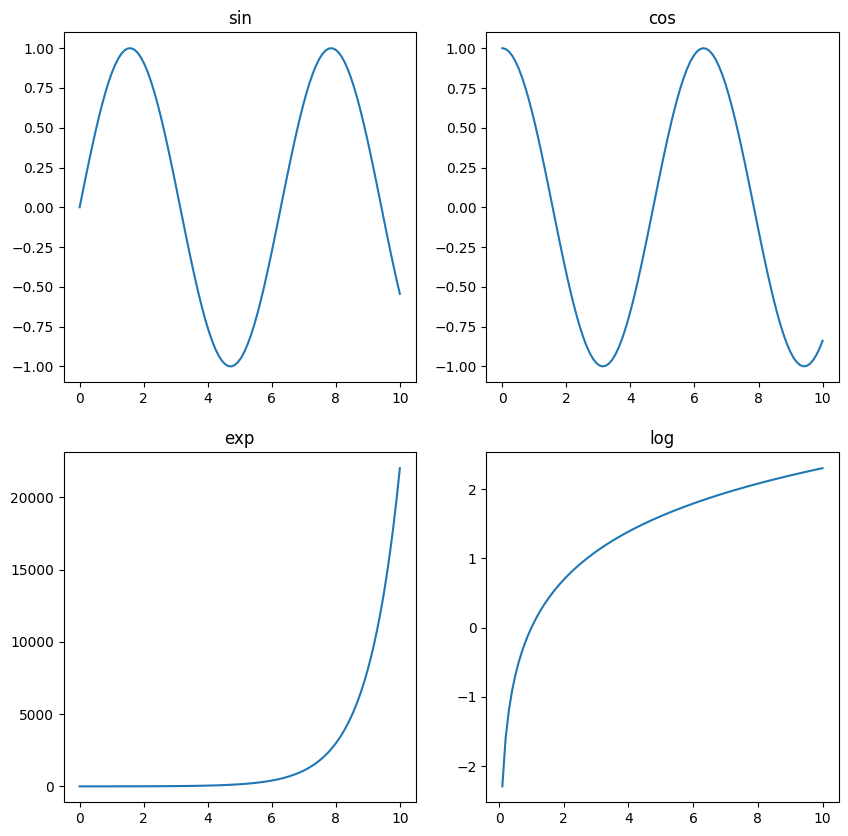

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)
fig, axes = plt.subplots(2,2,figsize=(10,10))

axes[0][0].plot(x, np.sin(x), label='sin')
axes[0][0].set_title('sin')

axes[0][1].plot(x, np.cos(x), label='cos')
axes[0][1].set_title('cos')

axes[1][0].plot(x, np.exp(x), label='exp')
axes[1][0].set_title('exp')

axes[1][1].plot(x, np.log(x), label='log')
axes[1][1].set_title('log')


### 10. Shared Axis and Tight Layout
Create a row of three subplots sharing the y-axis. Plot different sine waves with varying frequencies. Use `tight_layout()` or `constrained_layout=True` to ensure readability.

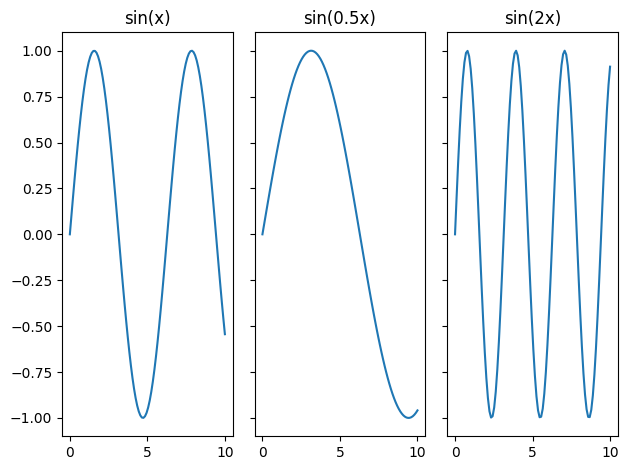

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)
fig, axes = plt.subplots(1,3,sharey=True)

axes[0].plot(x, np.sin(x), label='sin(x)')
axes[0].set_title('sin(x)')

axes[1].plot(x, np.sin(0.5*x), label='sin(0.5x)')
axes[1].set_title('sin(0.5x)')

axes[2].plot(x, np.sin(2*x), label='sin(2x)')
axes[2].set_title('sin(2x)')

plt.tight_layout()
plt.show()
